Training set original class distribution: Counter({3: 150, 1: 146, 2: 24, 4: 23})
Training set modified class distribution: Counter({2: 150, 0: 146, 1: 24, 3: 23})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        37
           1       0.20      0.17      0.18         6
           2       0.97      0.79      0.87        38
           3       0.80      0.80      0.80         5

    accuracy                           0.83        86
   macro avg       0.69      0.68      0.68        86
weighted avg       0.83      0.83      0.82        86

Accuracy Score: 0.8255813953488372


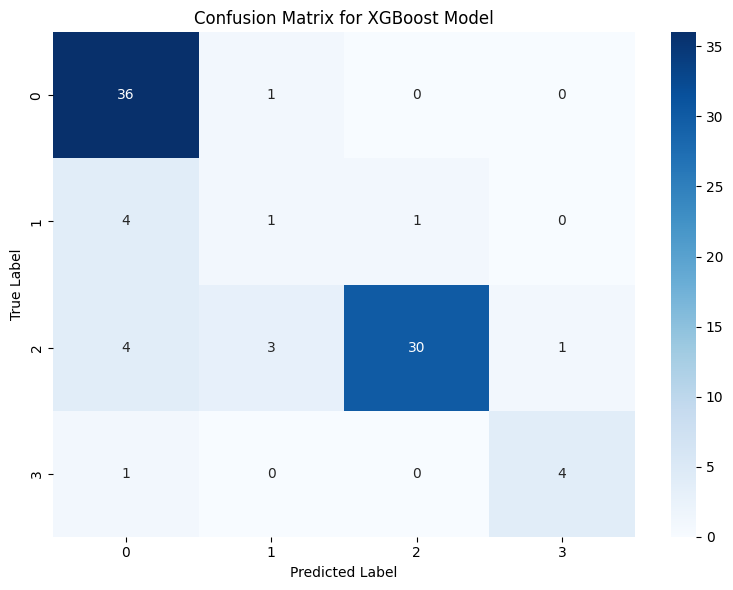

In [7]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter


# Load the normalized dataset (after data cleaning)



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Load the normalized dataset (adjust the file path as needed)
df_norm = pd.read_csv('/content/sample_data/processed_dataset.csv', index_col=0)

# Define features and target (assuming 'FailureMode' is the target column)
X = df_norm.drop(columns=['FailureMode'])
y = df_norm['FailureMode']

# Convert categorical variables into dummy variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set original class distribution:", Counter(y_train))

# Convert target labels from [1, 2, 3, 4] to [0, 1, 2, 3]
y_train = y_train - 1
y_test = y_test - 1

print("Training set modified class distribution:", Counter(y_train))

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot and save the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Model")
plt.tight_layout()
plt.savefig("xgb_confusion_matrix.png")
plt.show()



Training set original class distribution: Counter({2: 150, 0: 146, 1: 24, 3: 23})
Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       0.33      0.17      0.22         6
           2       0.97      0.87      0.92        38
           3       1.00      0.80      0.89         5

    accuracy                           0.87        86
   macro avg       0.78      0.71      0.73        86
weighted avg       0.86      0.87      0.86        86

Accuracy Score (RandomForest): 0.872093023255814


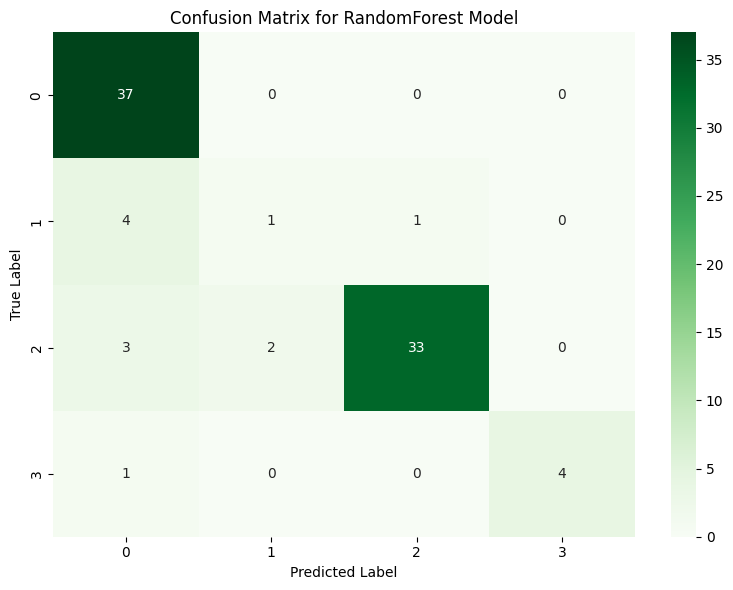

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Load the normalized dataset
df_norm = pd.read_csv('/content/sample_data/processed_dataset.csv', index_col=0)

# Define features and target (FailureMode)
X = df_norm.drop(columns=['FailureMode'])
y = df_norm['FailureMode']

# Convert categorical variables into dummy variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Adjust target labels: convert [1,2,3,4] to [0,1,2,3] for consistency
y = y - 1

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set original class distribution:", Counter(y_train))

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate model performance
print("Classification Report (RandomForest):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy Score (RandomForest):", accuracy_score(y_test, y_pred_rf))

# Plot and save the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for ´ Model")
plt.tight_layout()
plt.savefig("rf_confusion_matrix.png")
plt.show()
